CONTEXT: Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, present in person and online.


PROJECT OBJECTIVE: Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from the dataset.

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("DS+-+Part3+-+CompanyX_EU.csv")
print(data.shape)
data.head(10)

(662, 6)


,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating
9,Adgregate Markets,adgregate.com,NaN,TC50 2008,Contestant,Operating


#### Data exploration

In [5]:
data.isna().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64


- Turns out we do not have data of funds raised by all the companies
- We would need need it to perform the first task, hence we will have to ignore the companies of which we do not have data for the funds they raised


In [6]:
df1 = data.copy().dropna()

In [8]:
print(df1.shape)
df1.head()

(446, 6)


,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating


In [10]:
df1.duplicated().sum()

0

In [14]:
df1["Funding_in_Million"] = df1["Funding"].apply(lambda x : float(x[1:-1])/1000 if x[-1] == "K" else float(x[1:-1])*1000 if x[-1] == "B" else float(x[1:-1]))

In [16]:
df1.head(20)

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_Million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.6300
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.0000
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.3000
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.0000
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.8000
11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.0000
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating,1.0000
14,Aiden,aiden.ai,$750K,Disrupt London 2016,Contestant,Operating,0.7500
15,AirBoxLab,foobot.io,$17.9K,Hardware Battlefield 2014,Contestant,Operating,0.0179
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating,11.6000


In [22]:
import plotly.express as px
fig = px.box(df1['Funding_in_Million'])
fig.show()

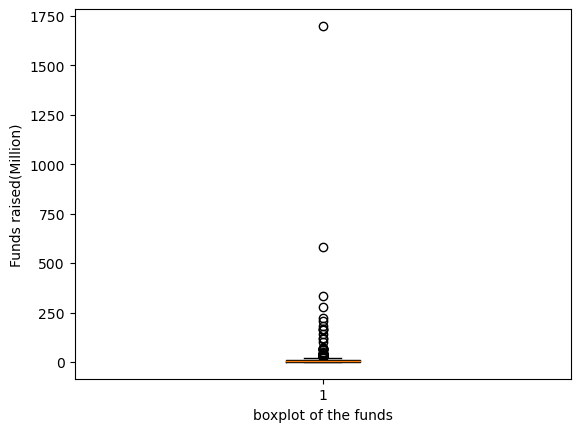

In [23]:
plot   = plt.boxplot(df1['Funding_in_Million'])
plt.xlabel("boxplot of the funds")
plt.ylabel('Funds raised(Million)')
plt.show()

In [26]:
upper_fence = plot["caps"][1].get_data()[1][1]

In [27]:
upper_fence

22.0

In [35]:
print(f'Number of Outliers : {len(df1[df1["Funding_in_Million"]> upper_fence])}')

Number of Outliers : 60


In [36]:
df1.drop(df1[df1["Funding_in_Million"]> upper_fence].index,inplace = True)

In [37]:
df1.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_Million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.00


In [38]:
df1['OperatingState'].value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

## Statistical analysis:

- Visually the distributions are quiet similar
- To prove if there is a significant difference or not we will have to perform a hypothesis test
- Since we want to compare the difference in means of the samples, we can either use 2 sample t test or z-test
- For this exercise we shall do both and compare the results
- One thing to notice is that the distributions are not normal yet, since our sample size is reasonably big ( >30 samples), we will go ahead with the aforementioned tests

##### Question: Is there any significant difference between Funds raised by companies that are still operating vs companies that got closed down: 

- Write the null hypothesis. 
- Write the alternative hypothesis. 
- Test for significance and Conclusion. 


For the first test, 

**Null hypothesis (Ho)** : There is no difference between the two means

**Alternate hypothesis (Ha)** : There is significant difference between the two means

In [41]:
sample1 = df1.loc[df1["OperatingState"]=="Operating","Funding_in_Million"]
sample2 = df1.loc[df1["OperatingState"]=="Closed","Funding_in_Million"]

In [42]:
from statsmodels.stats.weightstats import ztest

In [43]:
alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)  

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.192 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


In [45]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.193 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


*  From the tests above we found no evidence to state that the companies that have raised more money tend to suceed more or vice-versa

In [46]:
df1.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_Million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.00


In [47]:
df1["Result"].value_counts()

Contestant         282
Finalist            52
Audience choice     20
Winner              17
Runner up           15
Name: Result, dtype: int64

In [48]:
df2  = data.copy()

In [49]:
df2.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [51]:
df2.Result.value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

In [52]:
# Calculate percentage of winners
winners = df2.Result.value_counts()[1:].sum()
contestants = df2.Result.value_counts()['Contestant']

contestants_operating = df2.OperatingState[df2.Result == 'Contestant'].value_counts().loc['Operating']
winners_operating = df2.OperatingState[df2.Result != 'Contestant'].value_counts().loc['Operating']

winners_operating/winners, contestants_operating/contestants

(0.764367816091954, 0.680327868852459)

Null hyputhesis (Ho): The proportion of companies that are operating is the same in both categories - winners and contestants

Alternative hypothesis (Ha): The proportion of companies that are operating is significantly different from each other, among the two categories

In [57]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.037 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


##### Conclusion
- The amount of funds a company raises is not a significant factor in deciding if the company will remain operational or close down
- Winners in the battle have proven to remain operational more so, than the companies that came out only as contestants